In [2]:
# dependencies
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
# demographic regresssion

# load data
# demographic_df = pd.read_csv('8-8-2021 demographic reg data.csv', index_col=0)
demographic_df = pd.read_csv(r'../Regression Data Spreadsheets/Demographic with Ratios.csv', index_col=0)
demographic_df.info()
demographic_df.head(15)

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, Australia to South Africa
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country Code               718 non-null    object 
 1   Gold                       718 non-null    int64  
 2   Silver                     718 non-null    int64  
 3   Bronze                     718 non-null    int64  
 4   Total                      718 non-null    int64  
 5   Year                       718 non-null    int64  
 6   Host_City                  718 non-null    object 
 7   Host_Country               718 non-null    object 
 8   GDP                        718 non-null    float64
 9   Latitude Hemisphere        718 non-null    object 
 10  Longitude Hemisphere       718 non-null    object 
 11  Population                 718 non-null    int64  
 12  Life Expectancy            718 non-null    float64
 13  Average Distance to Games  718 non-nul

,Country Code,Gold,Silver,Bronze,Total,Year,Host_City,Host_Country,GDP,Latitude Hemisphere,...,Total Medal Count,Total Win Ratio,Total Male Competitors,Male Wins,Male Medal Ratio,Total Female Competitors,Female Wins,Female Medal Ratio,Open Wins,Open Win Ratio
Country,,,,,,,,,,,,,,,,,,,,,
Australia,AUS,18,4,10,18,1964,Tokyo,JPN,23.764139,South,...,18,0.074074,203,10,0.049261,40,7,0.175000,1,0.004115
Belgium,BEL,6,0,1,3,1964,Tokyo,JPN,15.960107,North,...,3,0.049180,60,3,0.050000,1,0,0.000000,0,0.000000
Brazil,BRA,0,0,1,1,1964,Tokyo,JPN,21.211892,South,...,1,0.016393,60,1,0.016667,1,0,0.000000,0,0.000000
Canada,CAN,3,4,1,4,1964,Tokyo,JPN,49.377523,North,...,4,0.034783,95,4,0.042105,20,0,0.000000,0,0.000000
Switzerland,CHE,3,4,1,4,1964,Tokyo,JPN,14.480557,North,...,4,0.060606,65,2,0.030769,1,0,0.000000,0,0.000000
Finland,FIN,9,0,2,5,1964,Tokyo,JPN,7.766655,North,...,5,0.056180,84,5,0.059524,5,0,0.000000,0,0.000000
France,FRA,3,16,6,15,1964,Tokyo,JPN,94.007851,North,...,15,0.108696,118,11,0.093220,20,2,0.100000,2,0.014493
United Kingdom,GBR,12,24,2,18,1964,Tokyo,JPN,94.407558,North,...,18,0.088235,160,11,0.068750,44,5,0.113636,2,0.009804
Ghana,GHA,0,0,1,1,1964,Tokyo,JPN,1.731296,North,...,1,0.030303,30,1,0.033333,3,0,0.000000,0,0.000000


In [14]:
# encode latitude
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

encode_df = pd.DataFrame(enc.fit_transform(demographic_df['Latitude Hemisphere'].values.reshape(-1,1)))

encode_df.columns = enc.get_feature_names(['Latitude_Hemisphere'])
encode_df.head(10)

,Latitude_Hemisphere_North,Latitude_Hemisphere_South
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [15]:
# drop one of the encoded columns becuase binary data can cause colinearity issues
encode_df.drop(columns=['Latitude_Hemisphere_North'], inplace=True)

In [20]:
# remove the first 2 columns and save in df to add back to predictions
countries = demographic_df.iloc[:,[0]]


In [21]:
# copy df to process
demo_to_process = demographic_df.copy()

In [24]:
# drop objects
demo_to_process.reset_index(inplace=True)
demo_to_process.drop(columns=['Country', 'Country Code', 'Year', 'Longitude Hemisphere'], inplace=True)

In [25]:
# replace hemisphere data with int 1 = south 0 = north
demo_to_process['Latitude Hemisphere'] = encode_df['Latitude_Hemisphere_South']
demo_to_process.head()

,index,Gold,Silver,Bronze,Total,Host_City,Host_Country,GDP,Latitude Hemisphere,Population,...,Total Medal Count,Total Win Ratio,Total Male Competitors,Male Wins,Male Medal Ratio,Total Female Competitors,Female Wins,Female Medal Ratio,Open Wins,Open Win Ratio
0,0,18,4,10,18,Tokyo,JPN,23.764139,1.0,11167000,...,18,0.074074,203,10,0.049261,40,7,0.175,1,0.004115
1,1,6,0,1,3,Tokyo,JPN,15.960107,0.0,9378113,...,3,0.049180,60,3,0.050000,1,0,0.000,0,0.000000
2,2,0,0,1,1,Tokyo,JPN,21.211892,1.0,81064572,...,1,0.016393,60,1,0.016667,1,0,0.000,0,0.000000
3,3,3,4,1,4,Tokyo,JPN,49.377523,0.0,19325000,...,4,0.034783,95,4,0.042105,20,0,0.000,0,0.000000
4,4,3,4,1,4,Tokyo,JPN,14.480557,0.0,5789228,...,4,0.060606,65,2,0.030769,1,0,0.000,0,0.000000


In [26]:
demo_to_process.drop(['index'], axis=1, inplace=True)

In [27]:
# asjust population scale
demo_to_process['Population'] = demo_to_process['Population'] / 100000

In [28]:
demo_to_process['Average Distance to Games'] = demo_to_process['Average Distance to Games'] / 10

In [31]:
demo_to_process.drop(columns=['Host_City', 'Host_Country'], inplace=True)

In [34]:
# save features list 'o'
demo_features = demo_to_process.columns.to_list()
demo_features.remove(demo_features[3])


['Gold',
 'Silver',
 'Bronze',
 'GDP',
 'Latitude Hemisphere',
 'Population',
 'Life Expectancy',
 'Average Distance to Games',
 'Total Competitors',
 'Total Medal Count',
 'Total Win Ratio',
 'Total Male Competitors',
 'Male Wins',
 'Male Medal Ratio',
 'Total Female Competitors',
 'Female Wins',
 'Female Medal Ratio',
 'Open Wins',
 'Open Win Ratio']

In [49]:
demo_to_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gold                       718 non-null    int64  
 1   Silver                     718 non-null    int64  
 2   Bronze                     718 non-null    int64  
 3   Total                      718 non-null    int64  
 4   GDP                        718 non-null    float64
 5   Latitude Hemisphere        718 non-null    float64
 6   Population                 718 non-null    float64
 7   Life Expectancy            718 non-null    float64
 8   Average Distance to Games  718 non-null    float64
 9   Total Competitors          718 non-null    int64  
 10  Total Medal Count          718 non-null    int64  
 11  Total Win Ratio            718 non-null    float64
 12  Total Male Competitors     718 non-null    int64  
 13  Male Wins                  718 non-null    int64  

In [75]:
# split into training and testing sets
X = demo_to_process.drop(columns=['Total Medal Count']).values

y = demo_to_process['Total Medal Count'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [51]:
# check shape of training data
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (574, 19)
Training Labels Shape: (574,)
Testing Features Shape: (144, 19)
Testing Labels Shape: (144,)


In [52]:
# fit to multiple linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predict test set results
y_pred = regressor.predict(X_test)

In [53]:
# send predictions to df
demo_predictions_df = pd.DataFrame({'Actual':y_test, 'Predicited':y_pred})

In [69]:
demo_predictions_df.shape

(144, 2)

In [70]:
countries.shape

(718, 1)

In [54]:
# check the results
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(regressor.intercept_)
print(regressor.coef_)

Mean Absolute Error: 0.19490120612144785
Mean Squared Error: 0.16887315152873514
Root Mean Squared Error: 0.4109417860582386
-0.32864017321477235
[-2.71554546e-04  1.40482817e-03  3.93895942e-03  4.55085532e-03
  4.52800570e-06  8.74331760e-02  6.37547613e-06  6.30088714e-03
 -8.46037665e-05 -2.84488881e-04  5.43799226e+00  2.06954266e-03
  9.92720551e-01 -4.39203298e+00 -2.35403155e-03  9.96996498e-01
 -1.78498338e+00  9.92925383e-01 -1.06490263e+01]


In [55]:
MAE = round(metrics.mean_absolute_error(y_test, y_pred),2)
print(f"Mean Absolute Error: {MAE} medals")

Mean Absolute Error: 0.19 medals


In [94]:
# check data with statsmodel.api
Y_stats = demo_to_process['Total Medal Count']
X_stats = demo_to_process.drop(columns=['Total Medal Count'])
X_stats = sm.add_constant(X_stats)
model = sm.OLS(Y_stats,X_stats)
results = model.fit()
results.params

const                        -0.280843
Gold                         -0.001234
Silver                        0.000515
Bronze                        0.007523
Total                         0.007369
GDP                           0.000008
Latitude Hemisphere           0.119270
Population                    0.000009
Life Expectancy               0.006143
Average Distance to Games    -0.000184
Total Competitors            -0.000294
Total Win Ratio               6.020754
Total Male Competitors        0.002538
Male Wins                     0.990484
Male Medal Ratio             -4.807879
Total Female Competitors     -0.002832
Female Wins                   0.994412
Female Medal Ratio           -1.999660
Open Wins                     0.989465
Open Win Ratio              -11.824730
dtype: float64

In [95]:
results.summary() 'o'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Total Medal Count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.535e+05
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:44:17   Log-Likelihood:                -307.45
No. Observations:                 718   AIC:                             650.9
Df Residuals:                     700   BIC:                             733.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.2808      0.159     -1.770      0.077      -0.592       0.031
Gold                         -0.0012      0.002     -0.620      0.536      -0.005       0.003
Silver                        0.0005      0.003      0.152      0.879      -0.006       0.007
Bronze                        0.0075      0.004      2.038      0.042       0.000       0.015
Total                         0.0074      0.003      2.658      0.008       0.002       0.013
GDP                        7.731e-06   1.36e-05      0.570      0.569   -1.89e-05    3.44e-05
Latitude Hemisphere           0.1193      0.056      2.120      0.034       0.009       0.230
Population                 9.497e-06    9.2e-06      1.032      0.302   -8.56e-06    2.76e-05
Life Expectancy               0.0061      0.002      3.056      0.002       0.002       0.010
Average Distance to Games    -0.0002      0.000     -1.171      0.242      -0.000       0.000
Total Competitors            -0.0003      0.000     -1.549      0.122      -0.001    7.86e-05
Total Win Ratio               6.0208      0.843      7.140      0.000       4.365       7.676
Total Male Competitors        0.0025      0.000      5.407      0.000       0.002       0.003
Male Wins                     0.9905      0.005    192.078      0.000       0.980       1.001
Male Medal Ratio             -4.8079      0.674     -7.136      0.000      -6.131      -3.485
Total Female Competitors     -0.0028      0.001     -5.237      0.000      -0.004      -0.002
Female Wins                   0.9944      0.004    224.792      0.000       0.986       1.003
Female Medal Ratio           -1.9997      0.261     -7.668      0.000      -2.512      -1.488
Open Wins                     0.9895      0.017     57.325      0.000       0.956       1.023
Open Win Ratio              -11.8247      3.656     -3.234      0.001     -19.003      -4.646
==============================================================================
Omnibus:                      670.381   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18081.102
Skew:                           4.343   Prob(JB):                         0.00
Kurtosis:                      25.999   Cond. No.                     4.28e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.81e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [97]:
# limit factors to low p-values
low_p_df = demo_to_process.drop(columns=['Gold', 'Silver', 'GDP', 'Population', 'Average Distance to Games', 'Total Competitors'])

# split into training and testing sets
X = low_p_df.values

y = demo_to_process['Total Medal Count'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
# import model
from sklearn.ensemble import RandomForestRegressor

# start model with 1000 decision trees
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# train model on training data
rf.fit(X_train, y_train)

# use predictions on the test data
low_p_pred = rf.predict(X_test)

In [100]:
# predictions on low p
low_p_pred = rf.predict(X_test)

# calculate the absolute errors
low_p_errors = abs(low_p_pred - y_test)

# print mean absolute error
print(f"Mean Absolute Error: {round(np.mean(low_p_errors),2)} medals")

Mean Absolute Error: 0.2 medals


In [77]:
# use predictions on the test data
demo_predictions = rf.predict(X_test)

# calculate the absolute errors
demo_errors = abs(demo_predictions - y_test)

# print mean absolute error
print(f"Mean Absolute Error: {round(np.mean(demo_errors),2)} medals")

Mean Absolute Error: 0.28 medals


In [78]:
# calculate mean absolute percentage error (MAPE)
demo_mape = 100 * (demo_errors / y_test)

# display accuracy
demo_accuracy = 100 - np.mean(demo_mape)
print(f"Accuracy: {round(demo_accuracy,2)}%")

Accuracy: 99.25%


In [79]:
# review feature importance
f_importances = list(rf.feature_importances_)

# tuples with variable and importance
f_importances_list = [(feature, round(importance, 2)) for feature, importance in zip(demo_features, f_importances)]

# sort features by importance
f_importances_list = sorted(f_importances_list, key = lambda x: x[1], reverse=True)

# print the list
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in f_importances_list]

Feature: GDP                  Importance: 0.39
Feature: Male Wins            Importance: 0.36
Feature: Female Wins          Importance: 0.21
Feature: Gold                 Importance: 0.01
Feature: Female Medal Ratio   Importance: 0.01
Feature: Silver               Importance: 0.0
Feature: Bronze               Importance: 0.0
Feature: Latitude Hemisphere  Importance: 0.0
Feature: Population           Importance: 0.0
Feature: Life Expectancy      Importance: 0.0
Feature: Average Distance to Games Importance: 0.0
Feature: Total Competitors    Importance: 0.0
Feature: Total Medal Count    Importance: 0.0
Feature: Total Win Ratio      Importance: 0.0
Feature: Total Male Competitors Importance: 0.0
Feature: Male Medal Ratio     Importance: 0.0
Feature: Total Female Competitors Importance: 0.0
Feature: Open Wins            Importance: 0.0
Feature: Open Win Ratio       Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [80]:
# scaled random forest
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [86]:
# retrain random forest
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_fit = rf_reg.fit(X_train_scaled, y_train)
y_predictions = rf_reg.predict(X_test_scaled)

In [87]:
# metrics
scaled_MAE = metrics.mean_absolute_error(y_test, y_predictions)
scaled_MSE = metrics.mean_squared_error(y_test, y_predictions)
scaled_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_predictions))

print(f"Mean Absolute Error: {round(scaled_MAE,4)} medals.")
print(f"Mean Squared Error: {round(scaled_MSE,4)}.")
print(f"Root Mean Squared Error: {round(scaled_RMSE,4)}.")
 

Mean Absolute Error: 0.2864 medals.
Mean Squared Error: 1.2269.
Root Mean Squared Error: 1.1076.


In [88]:
metrics.r2_score(y_test, y_predictions)

0.9970977557953185

In [84]:
# review feature importance
f_importances = list(rf.feature_importances_)

# tuples with variable and importance
f_importances_list = [(feature, round(importance, 2)) for feature, importance in zip(demo_features, f_importances)]

# sort features by importance
f_importances_list = sorted(f_importances_list, key = lambda x: x[1], reverse=True)

# print the list
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in f_importances_list]

Feature: GDP                  Importance: 0.39
Feature: Male Wins            Importance: 0.36
Feature: Female Wins          Importance: 0.21
Feature: Gold                 Importance: 0.01
Feature: Female Medal Ratio   Importance: 0.01
Feature: Silver               Importance: 0.0
Feature: Bronze               Importance: 0.0
Feature: Latitude Hemisphere  Importance: 0.0
Feature: Population           Importance: 0.0
Feature: Life Expectancy      Importance: 0.0
Feature: Average Distance to Games Importance: 0.0
Feature: Total Competitors    Importance: 0.0
Feature: Total Medal Count    Importance: 0.0
Feature: Total Win Ratio      Importance: 0.0
Feature: Total Male Competitors Importance: 0.0
Feature: Male Medal Ratio     Importance: 0.0
Feature: Total Female Competitors Importance: 0.0
Feature: Open Wins            Importance: 0.0
Feature: Open Win Ratio       Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [89]:
sci_importances = rf_reg.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf_reg.estimators_], axis=0)

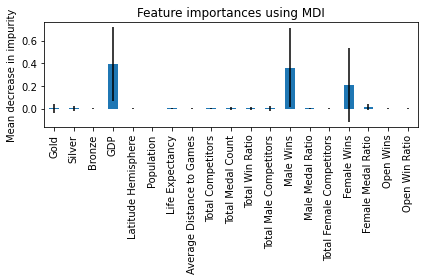

In [91]:
rf_importances = pd.Series(sci_importances, index=demo_features)

fig, ax = plt.subplots()
rf_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
# split into training and testing sets
X = demo_to_process.drop(columns=['Total Medal Count', 'GDP']).values

y = demo_to_process['Total Medal Count'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [25]:
# load results without demographic data
competition_data_df = pd.read_csv('8-8-2021 comp only regression.csv')
competition_data_df.info()
competition_data_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      876 non-null    int64  
 1   Country Code              876 non-null    object 
 2   Total Competitors         876 non-null    int64  
 3   Gold                      876 non-null    int64  
 4   Silver                    876 non-null    int64  
 5   Bronze                    876 non-null    int64  
 6   Total Medal Count         876 non-null    int64  
 7   Total Win Ratio           876 non-null    float64
 8   Total Male Competitors    876 non-null    int64  
 9   Male Wins                 876 non-null    int64  
 10  Male Medal Ratio          876 non-null    float64
 11  Total Female Competitors  876 non-null    int64  
 12  Female Wins               876 non-null    int64  
 13  Female Medal Ratio        876 non-null    float64
 14  Open Wins 

,Year,Country Code,Total Competitors,Gold,Silver,Bronze,Total Medal Count,Total Win Ratio,Total Male Competitors,Male Wins,Male Medal Ratio,Total Female Competitors,Female Wins,Female Medal Ratio,Open Wins,Open Win Ratio
0,1964,ARG,102,0,2,0,1,0.009804,96,0,0.000000,6,0,0.000000,1,0.009804
1,1964,BHS,11,3,0,0,1,0.090909,11,0,0.000000,0,0,0.000000,0,0.000000
2,1964,AUS,243,18,4,10,18,0.074074,203,10,0.049261,40,7,0.175000,1,0.004115
3,1964,BEL,61,6,0,1,3,0.049180,60,3,0.050000,1,0,0.000000,0,0.000000
4,1964,BGR,63,9,10,2,10,0.158730,56,10,0.178571,7,0,0.000000,0,0.000000
5,1964,BRA,61,0,0,1,1,0.016393,60,1,0.016667,1,0,0.000000,0,0.000000
6,1964,CAN,115,3,4,1,4,0.034783,95,4,0.042105,20,0,0.000000,0,0.000000
7,1964,CHE,66,3,4,1,4,0.060606,65,2,0.030769,1,0,0.000000,0,0.000000
8,1964,CUB,27,0,2,0,1,0.037037,25,1,0.040000,2,0,0.000000,0,0.000000
9,1964,CZE,104,15,12,3,14,0.134615,95,10,0.105263,9,4,0.444444,0,0.000000


In [26]:
# drop object / time data
comp_data_to_process = competition_data_df.drop(columns=['Year', 'Country Code'])

In [28]:
# split into training and testing sets
X_comp = comp_data_to_process.drop(columns=['Total Medal Count']).values
y_comp = comp_data_to_process['Total Medal Count'].values

X_train, X_test, y_train, y_test = train_test_split(X_comp, y_comp, test_size=0.2, random_state=42)

In [29]:
# fit to multiple linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predict test set results
y_pred = regressor.predict(X_test)

In [30]:
# send predictions to df
comp_predictions_df = pd.DataFrame({'Actual':y_test, 'Predicited':y_pred})

In [31]:
# check the results
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(regressor.intercept_)
print(regressor.coef_)

Mean Absolute Error: 0.17503111203135557
Mean Squared Error: 0.19460227658747942
Root Mean Squared Error: 0.44113748037032563
0.031915316204180755
[-8.19408441e-02  1.69451518e-03  3.63748869e-03  1.12775924e-02
  1.25423208e+00  8.42907277e-02  9.86606363e-01 -8.57175091e-01
  7.91100384e-02  9.98224068e-01 -4.92654881e-01  9.92382287e-01
 -6.25075924e+00]


In [32]:
# check data with statsmodel.api
Y = comp_data_to_process['Total Medal Count']
X = comp_data_to_process.drop(columns=['Total Medal Count'])
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const                       0.031568
Total Competitors          -0.084806
Gold                        0.002719
Silver                      0.004815
Bronze                      0.012549
Total Win Ratio             1.071018
Total Male Competitors      0.087275
Male Wins                   0.983552
Male Medal Ratio           -0.667236
Total Female Competitors    0.082015
Female Wins                 0.996495
Female Medal Ratio         -0.510410
Open Wins                   0.987309
Open Win Ratio             -6.089398
dtype: float64

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Total Medal Count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.328e+05
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:42:04   Log-Likelihood:                -367.04
No. Observations:                 876   AIC:                             762.1
Df Residuals:                     862   BIC:                             828.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0316      0.024      1.309      0.191      -0.016       0.079
Total Competitors           -0.0848      0.124     -0.684      0.494      -0.328       0.159
Gold                         0.0027      0.002      1.651      0.099      -0.001       0.006
Silver                       0.0048      0.003      1.509      0.132      -0.001       0.011
Bronze                       0.0125      0.006      2.154      0.032       0.001       0.024
Total Win Ratio              1.0710      0.303      3.533      0.000       0.476       1.666
Total Male Competitors       0.0873      0.124      0.704      0.482      -0.156       0.331
Male Wins                    0.9836      0.005    215.238      0.000       0.975       0.993
Male Medal Ratio            -0.6672      0.245     -2.725      0.007      -1.148      -0.187
Total Female Competitors     0.0820      0.124      0.661      0.509      -0.161       0.325
Female Wins                  0.9965      0.004    243.329      0.000       0.988       1.005
Female Medal Ratio          -0.5104      0.132     -3.874      0.000      -0.769      -0.252
Open Wins                    0.9873      0.015     66.267      0.000       0.958       1.017
Open Win Ratio              -6.0894      2.475     -2.461      0.014     -10.947      -1.232
==============================================================================
Omnibus:                      893.433   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33281.040
Skew:                           4.950   Prob(JB):                         0.00
Kurtosis:                      31.527   Cond. No.                     4.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
# 2020 data import
medals_2020_df = pd.read_clipboard()
medals_2020_df.head()

,Country Code,Total Medals,Gold,Gold_scaled,Total_S,Silver_Scaled,Total_B,Bronze_scaled,Total Competitors,Total Win Ratio,...,Male Wins,Male win ratio,Total Women,Female Wins,Female Win Ratio,Open Wins,Open Win Ratio,GDP,Population,Life_Expectancy
0,SMR,3,NaN,0,1.0,2,2.0,2,5,0.600000,...,1,0.333333,2,1,0.500000,1,0.2,1.616370e+09,33938,75.456605
1,BMU,1,1.0,3,NaN,0,NaN,0,2,0.500000,...,0,0.000000,1,1,1.000000,0,0.0,7.484113e+09,63903,81.866585
2,FJI,2,1.0,3,NaN,0,1.0,1,34,0.058824,...,2,0.125000,18,0,0.000000,0,0.0,4.376015e+09,896444,67.444000
3,MUS,1,1.0,3,NaN,0,NaN,0,48,0.020833,...,1,0.029412,14,0,0.000000,0,0.0,1.091407e+10,1265740,74.235854
4,EST,2,1.0,3,NaN,0,1.0,1,34,0.058824,...,0,0.000000,14,2,0.142857,0,0.0,3.102997e+10,1331057,78.497561


In [103]:
medals_2020_df.fillna(0,inplace=True)

In [105]:
demo_to_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gold                       718 non-null    int64  
 1   Silver                     718 non-null    int64  
 2   Bronze                     718 non-null    int64  
 3   Total                      718 non-null    int64  
 4   GDP                        718 non-null    float64
 5   Latitude Hemisphere        718 non-null    float64
 6   Population                 718 non-null    float64
 7   Life Expectancy            718 non-null    float64
 8   Average Distance to Games  718 non-null    float64
 9   Total Competitors          718 non-null    int64  
 10  Total Medal Count          718 non-null    int64  
 11  Total Win Ratio            718 non-null    float64
 12  Total Male Competitors     718 non-null    int64  
 13  Male Wins                  718 non-null    int64  

In [144]:
# split into training and testing sets
X_2020 = demo_to_process.drop(columns=['Total', 'Total Medal Count']).values

y_2020 = demo_to_process['Total Medal Count'].values

X_train_2020, X_test_2020, y_train_2020, y_test_2020 = train_test_split(X_2020,y_2020, test_size=0.2, random_state=42)
# import model
from sklearn.ensemble import RandomForestRegressor

# start model with 1000 decision trees
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# train model on training data
rf_final_fit = rf.fit(X_train_2020, y_train_2020)

# use predictions on the test data
y_pred_setup = rf.predict(X_test_2020)

In [145]:
# check the results
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test_2020, y_pred_setup))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2020, y_pred_setup))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2020, y_pred_setup)))

Mean Absolute Error: 0.6576736111111112
Mean Squared Error: 1.9794276041666672
Root Mean Squared Error: 1.4069213212424734


In [111]:
rf_final_fit.shape

AttributeError: 'RandomForestRegressor' object has no attribute 'shape'

In [113]:
medals_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Code       86 non-null     object 
 1   Total Medals       86 non-null     int64  
 2   Gold               86 non-null     float64
 3   Gold_scaled        86 non-null     int64  
 4   Total_S            86 non-null     float64
 5   Silver_Scaled      86 non-null     int64  
 6   Total_B            86 non-null     float64
 7   Bronze_scaled      86 non-null     int64  
 8   Total Competitors  86 non-null     int64  
 9   Total Win Ratio    86 non-null     float64
 10  Total Men          86 non-null     int64  
 11  Male Wins          86 non-null     int64  
 12  Male win ratio     86 non-null     float64
 13  Total Women        86 non-null     int64  
 14  Female Wins        86 non-null     int64  
 15  Female Win Ratio   86 non-null     float64
 16  Open Wins          86 non-nu

In [114]:
df_2020_test = medals_2020_df.drop(columns=['Country Code', 'Total Medals'])

In [119]:
df_2020_test.drop(columns=['Bronze_scaled'], inplace=True)

In [120]:
pred_2020_medals = rf.predict(df_2020_test)

In [128]:
pred_2020_df = pd.DataFrame({'Predicted': pred_2020_medals})

In [125]:
pred_2020_df.shape

(86, 1)

In [126]:
# check the results
print('Mean Absolute Error:',metrics.mean_absolute_error(medals_2020_df['Total Medals'], pred_2020_medals))
print('Mean Squared Error:', metrics.mean_squared_error(medals_2020_df['Total Medals'], pred_2020_medals))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(medals_2020_df['Total Medals'], pred_2020_medals)))

Mean Absolute Error: 3.3068604651162796
Mean Squared Error: 36.48344393023256
Root Mean Squared Error: 6.0401526413024165


In [127]:
# send predictions to df
predictions_2020_df = pd.DataFrame({'Actual':medals_2020_df['Total Medals'], 'Predicited':pred_2020_medals})

In [129]:
final_2020_df = medals_2020_df.copy()
final_2020_df['Prediction'] = pred_2020_df
final_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Code       86 non-null     object 
 1   Total Medals       86 non-null     int64  
 2   Gold               86 non-null     float64
 3   Gold_scaled        86 non-null     int64  
 4   Total_S            86 non-null     float64
 5   Silver_Scaled      86 non-null     int64  
 6   Total_B            86 non-null     float64
 7   Bronze_scaled      86 non-null     int64  
 8   Total Competitors  86 non-null     int64  
 9   Total Win Ratio    86 non-null     float64
 10  Total Men          86 non-null     int64  
 11  Male Wins          86 non-null     int64  
 12  Male win ratio     86 non-null     float64
 13  Total Women        86 non-null     int64  
 14  Female Wins        86 non-null     int64  
 15  Female Win Ratio   86 non-null     float64
 16  Open Wins          86 non-nu

In [130]:
final_2020_df.columns.to_list()

['Country Code',
 'Total Medals',
 'Gold',
 'Gold_scaled',
 'Total_S',
 'Silver_Scaled',
 'Total_B',
 'Bronze_scaled',
 'Total Competitors',
 'Total Win Ratio',
 'Total Men',
 'Male Wins',
 'Male win ratio',
 'Total Women',
 'Female Wins',
 'Female Win Ratio',
 'Open Wins',
 'Open Win Ratio',
 'GDP',
 'Population',
 'Life_Expectancy',
 'Prediction']

In [131]:
col_order = ['Country Code',
'Total Medals',
'Prediction',
'Gold',
'Gold_scaled',
'Total_S',
'Silver_Scaled',
'Total_B',
'Bronze_scaled',
'Total Competitors',
'Total Win Ratio',
'Total Men',
'Male Wins',
'Male win ratio',
'Total Women',
'Female Wins',
'Female Win Ratio',
'Open Wins',
'Open Win Ratio',
'GDP',
'Population',
'Life_Expectancy']

In [132]:
final_2020_df = final_2020_df[col_order]
final_2020_df.head()

,Country Code,Total Medals,Prediction,Gold,Gold_scaled,Total_S,Silver_Scaled,Total_B,Bronze_scaled,Total Competitors,...,Male Wins,Male win ratio,Total Women,Female Wins,Female Win Ratio,Open Wins,Open Win Ratio,GDP,Population,Life_Expectancy
0,SMR,3,1.945,0.0,0,1.0,2,2.0,2,5,...,1,0.333333,2,1,0.500000,1,0.2,1.616370e+09,33938,75.456605
1,BMU,1,1.941,1.0,3,0.0,0,0.0,0,2,...,0,0.000000,1,1,1.000000,0,0.0,7.484113e+09,63903,81.866585
2,FJI,2,1.674,1.0,3,0.0,0,1.0,1,34,...,2,0.125000,18,0,0.000000,0,0.0,4.376015e+09,896444,67.444000
3,MUS,1,1.670,1.0,3,0.0,0,0.0,0,48,...,1,0.029412,14,0,0.000000,0,0.0,1.091407e+10,1265740,74.235854
4,EST,2,2.938,1.0,3,0.0,0,1.0,1,34,...,0,0.000000,14,2,0.142857,0,0.0,3.102997e+10,1331057,78.497561


In [133]:
final_2020_df['Prediction Error'] = final_2020_df['Prediction'] - final_2020_df['Total Medals']
final_2020_df.head(15)

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Country Code,Total Medals,Prediction,Gold,Gold_scaled,Total_S,Silver_Scaled,Total_B,Bronze_scaled,Total Competitors,...,Male win ratio,Total Women,Female Wins,Female Win Ratio,Open Wins,Open Win Ratio,GDP,Population,Life_Expectancy,Prediction Error
0,SMR,3,1.945,0.0,0,1.0,2,2.0,2,5,...,0.333333,2,1,0.500000,1,0.2,1.616370e+09,33938,75.456605,-1.055
1,BMU,1,1.941,1.0,3,0.0,0,0.0,0,2,...,0.000000,1,1,1.000000,0,0.0,7.484113e+09,63903,81.866585,0.941
2,FJI,2,1.674,1.0,3,0.0,0,1.0,1,34,...,0.125000,18,0,0.000000,0,0.0,4.376015e+09,896444,67.444000,-0.326
3,MUS,1,1.670,1.0,3,0.0,0,0.0,0,48,...,0.029412,14,0,0.000000,0,0.0,1.091407e+10,1265740,74.235854,0.670
4,EST,2,2.938,1.0,3,0.0,0,1.0,1,34,...,0.000000,14,2,0.142857,0,0.0,3.102997e+10,1331057,78.497561,0.938
5,LVA,2,1.671,1.0,3,0.0,0,1.0,1,33,...,0.100000,13,0,0.000000,0,0.0,3.350519e+10,1901548,75.239024,-0.329
6,MKD,1,1.672,0.0,0,1.0,2,0.0,0,8,...,0.200000,3,0,0.000000,0,0.0,1.226695e+10,2083380,75.797000,0.672
7,SVN,5,3.932,3.0,9,1.0,2,1.0,1,54,...,0.103448,25,2,0.080000,0,0.0,5.288047e+10,2100126,81.280488,-1.068
8,NAM,1,1.950,0.0,0,1.0,2,0.0,0,12,...,0.000000,6,1,0.166667,0,0.0,1.069993e+10,2540916,63.708000,0.950
9,LTU,1,1.691,0.0,0,1.0,2,0.0,0,41,...,0.040000,16,0,0.000000,0,0.0,5.588727e+10,2794700,76.134146,0.691


In [134]:
final_2020_df.to_csv('2020 Results and Predictions.csv', index=False)

In [136]:
from sklearn.tree import export_graphviz
import pydotplus

In [141]:
demo_features.remove('Medals Scaled') 
demo_features.remove('Total Medal Count') 
demo_features

['Gold',
 'Silver',
 'Bronze',
 'GDP',
 'Latitude Hemisphere',
 'Population',
 'Life Expectancy',
 'Average Distance to Games',
 'Total Competitors',
 'Total Win Ratio',
 'Total Male Competitors',
 'Male Wins',
 'Male Medal Ratio',
 'Total Female Competitors',
 'Female Wins',
 'Female Medal Ratio',
 'Open Wins',
 'Open Win Ratio']

In [142]:
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names=demo_features, rounded = True, precision = 1)


# Use dot file to create a graph
(graph, ) = pydotplus.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

TypeError: cannot unpack non-iterable Dot object

In [143]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clfrf, 
                   feature_names=demo_features,  
                   class_names=y_2020,
                   filled=True)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'plot_tree'

<Figure size 1800x1440 with 0 Axes>